## Apress - Industrialized Machine Learning Examples

Andreas Francois Vermeulen
2019

### This is an example add-on to a book and needs to be accepted as part of that copyright.

## Chapter-010-05-Evolutionary-Algorithm-02

In [1]:
mtype = 'A' ## Set to 'A' for 200 loops and 'B' for Early Stop @ 0.001

## Part A - Load the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Part B - Setup the parameters

In [3]:
DNA_SIZE = 1             # DNA (real number)
DNA_BOUND = [0, 5]       # solution upper and lower bounds
N_GENERATIONS = 200
MUT_STRENGTH = 7.5       # initial step size (dynamic mutation strength)

## Part C - Requirement is to find the maximum of this function

In [4]:
def F(x):
    v = (np.sin(10*x)*x) + (np.cos(2*x)*x)
    return v 

## Part D - Find non-zero fitness for selection

In [5]:
def get_fitness(pred): return pred.flatten()

## Part E - Spawn new population member

In [6]:
def make_kid(parent):
    # no crossover, only mutation
    k = parent + MUT_STRENGTH * np.random.randn(DNA_SIZE)
    k = np.clip(k, *DNA_BOUND)
    return k

## Part F - Extinct unfit population member

In [7]:
def kill_bad(parent, kid):
    global MUT_STRENGTH
    fp = get_fitness(F(parent))[0]
    fk = get_fitness(F(kid))[0]
    p_target = 1/5
    if fp < fk:     # kid better than parent
        parent = kid
        ps = 1.     # kid win -> ps = 1 (successful offspring)
    else:
        ps = 0.
    # adjust global mutation strength
    MUT_STRENGTH *= np.exp(1/np.sqrt(DNA_SIZE+1) * (ps - p_target)/(1 - p_target))
    return parent

## Part G - Generate a population

In [8]:
np.random.seed(1968)
parent = 5 * np.random.rand(DNA_SIZE)   # parent DNA

## Part H - Evolve through the generations

### Method A - Loop 200 times

In [9]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

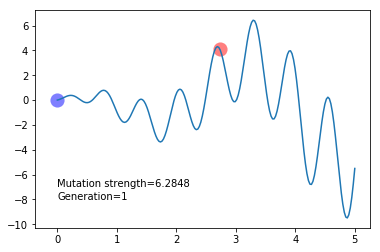

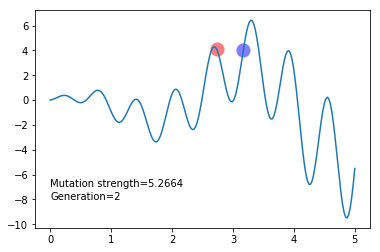

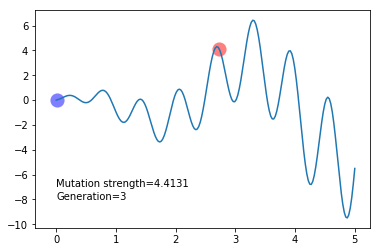

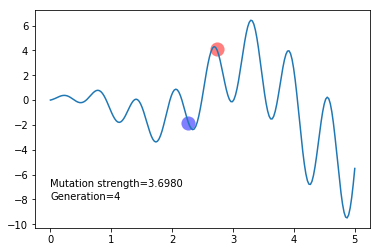

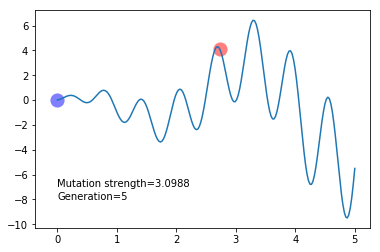

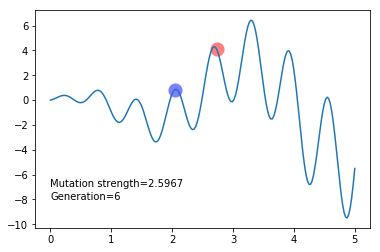

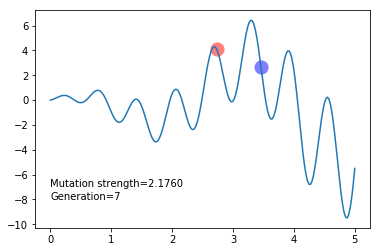

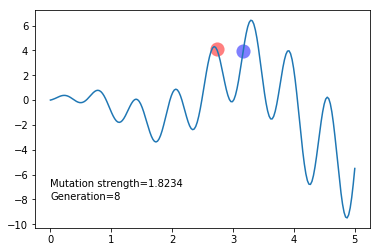

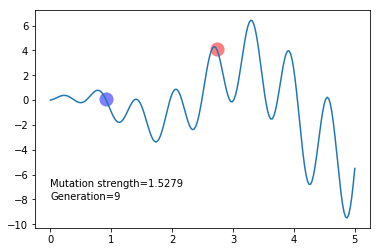

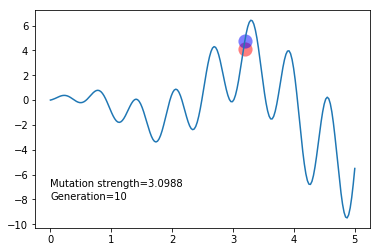

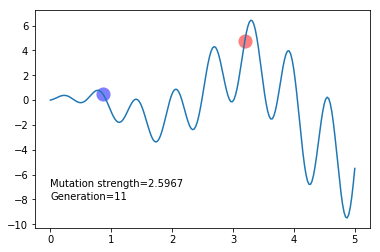

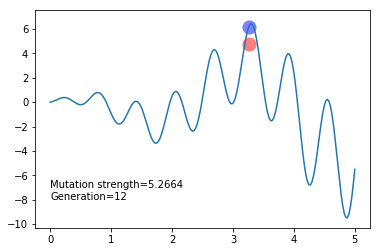

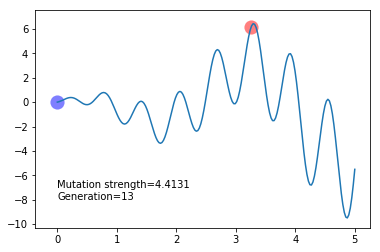

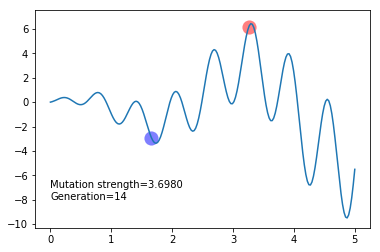

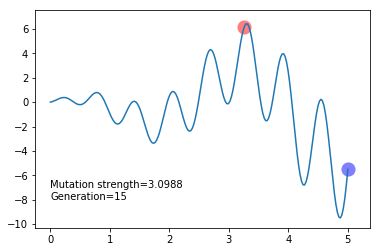

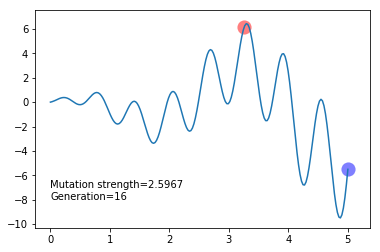

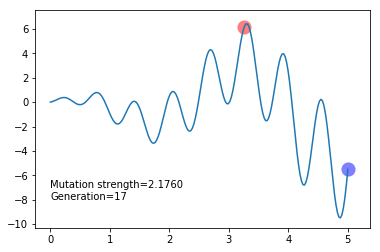

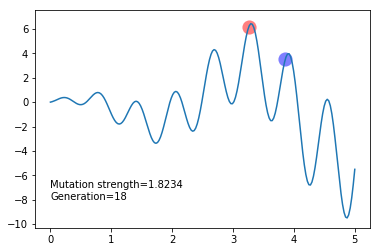

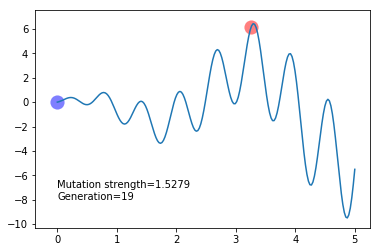

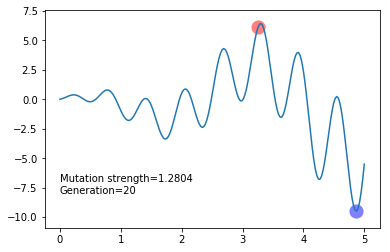

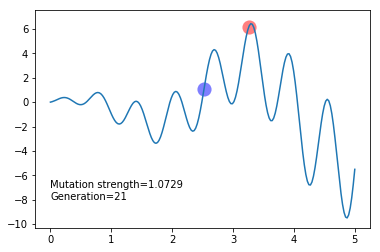

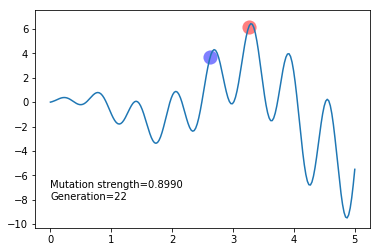

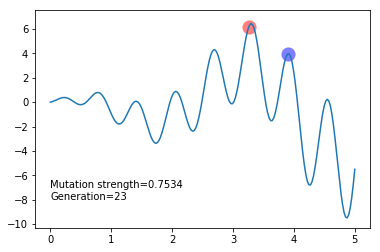

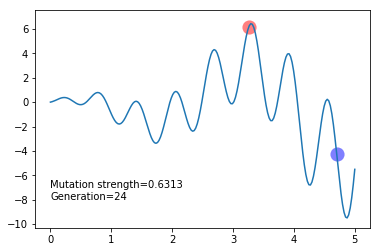

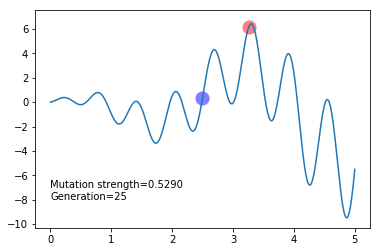

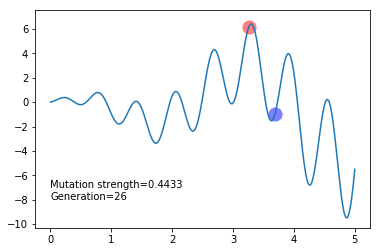

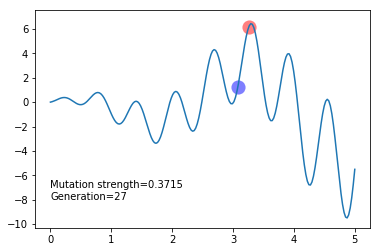

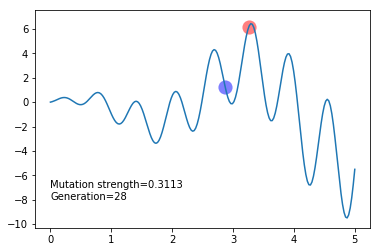

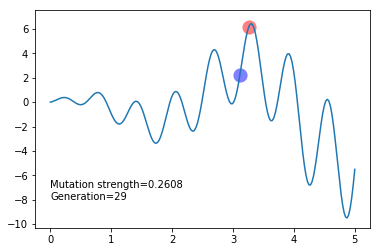

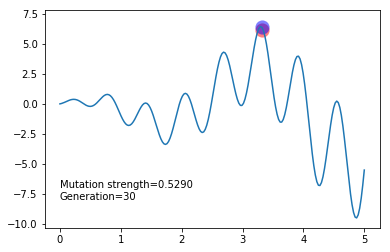

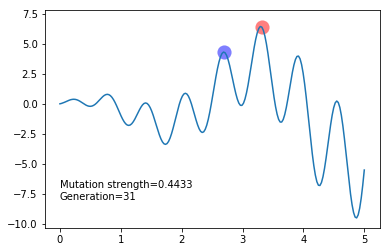

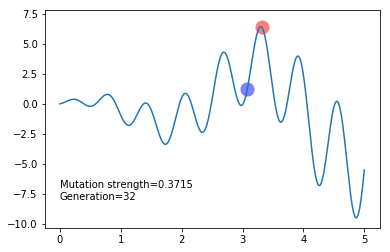

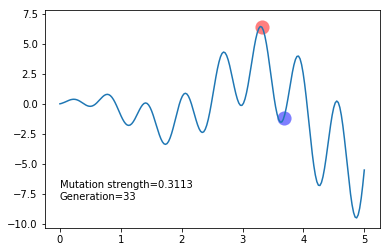

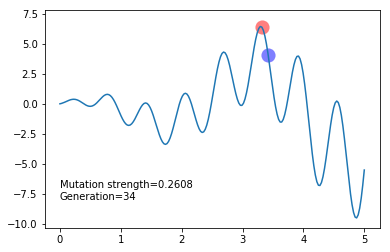

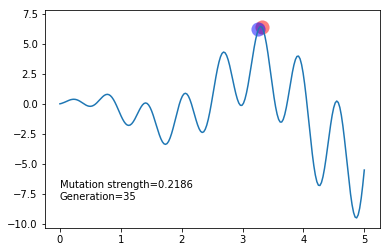

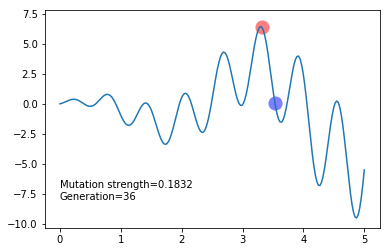

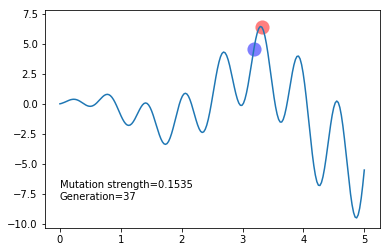

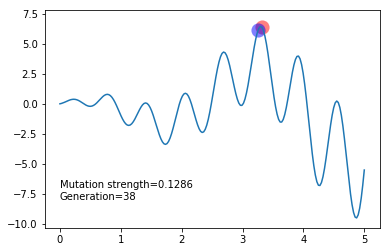

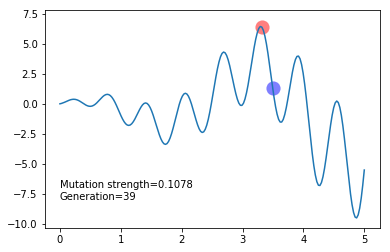

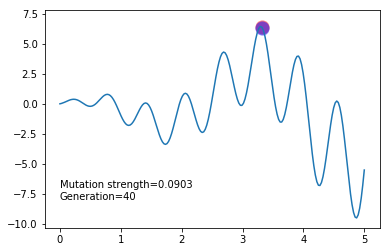

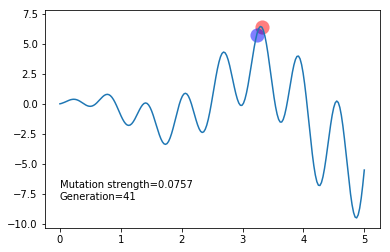

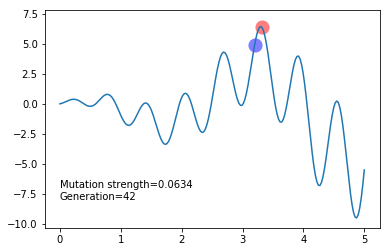

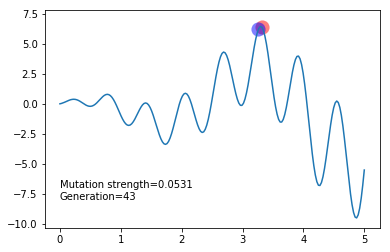

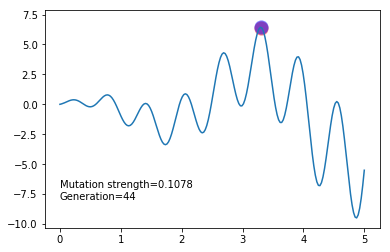

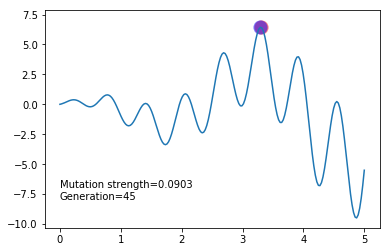

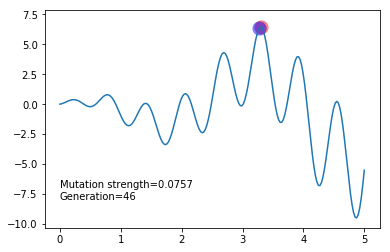

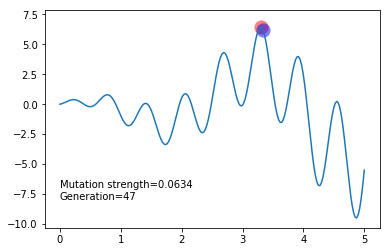

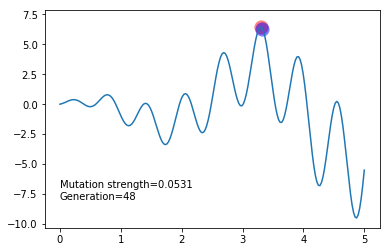

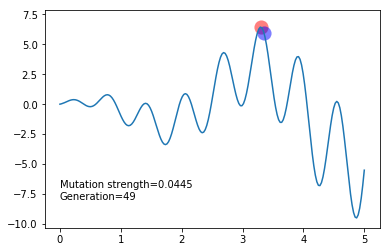

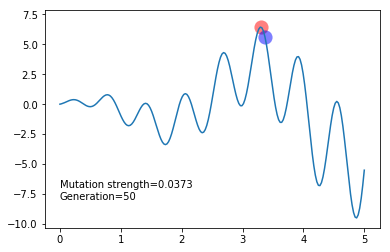

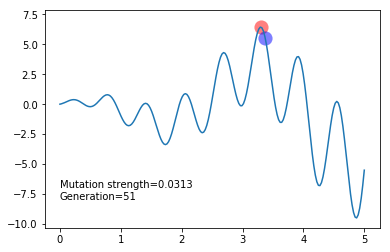

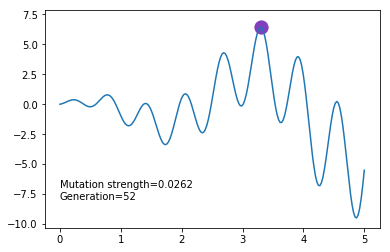

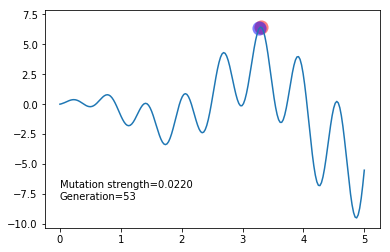

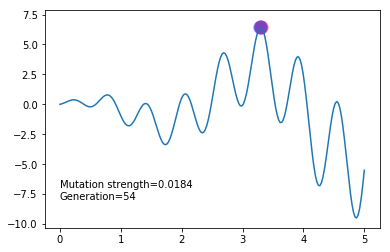

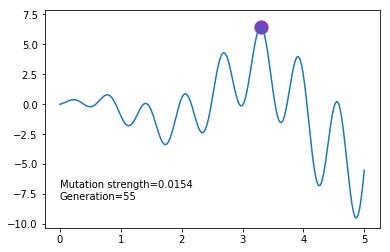

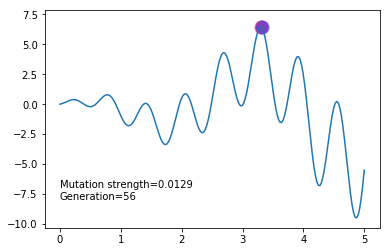

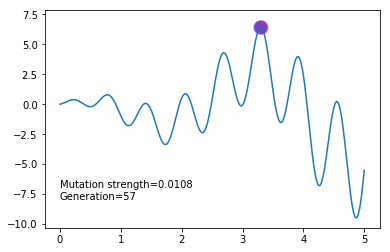

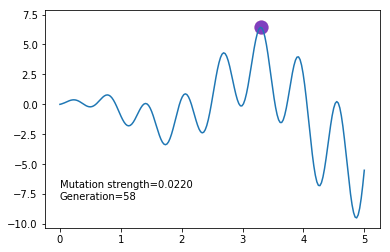

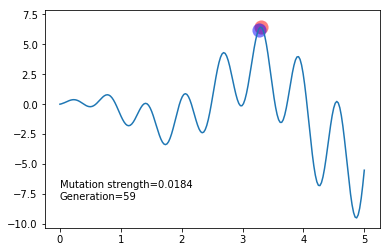

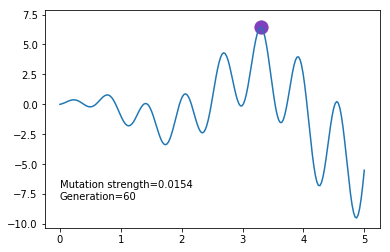

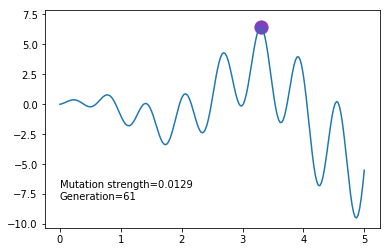

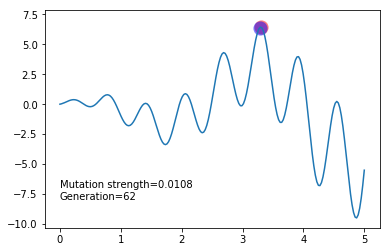

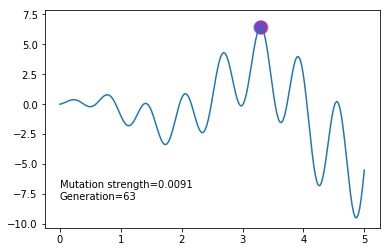

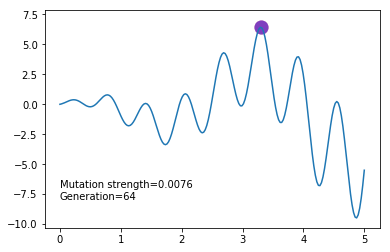

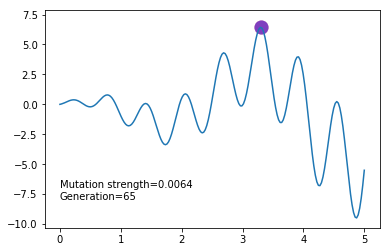

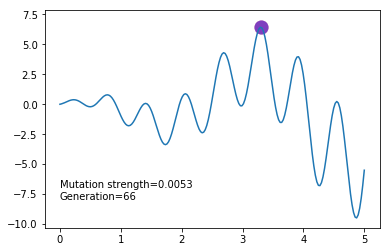

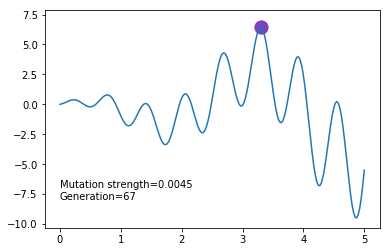

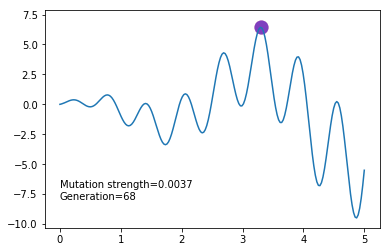

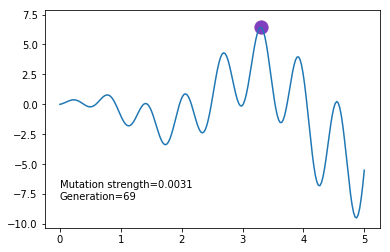

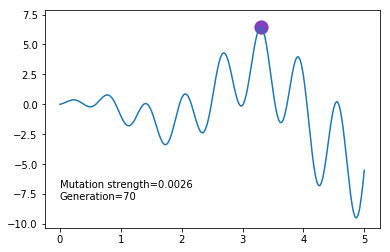

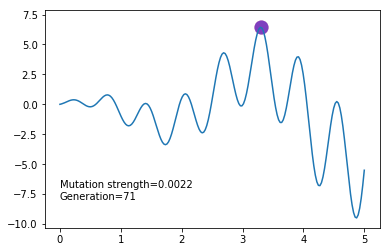

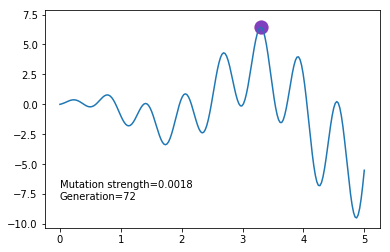

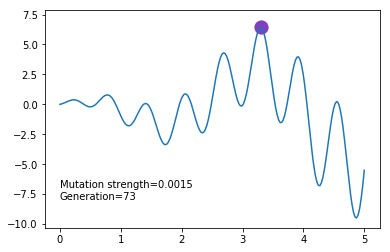

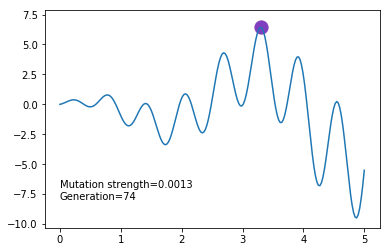

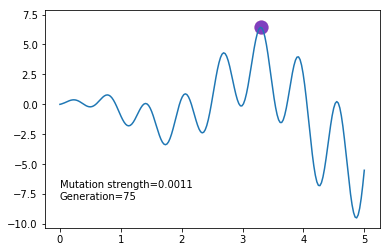

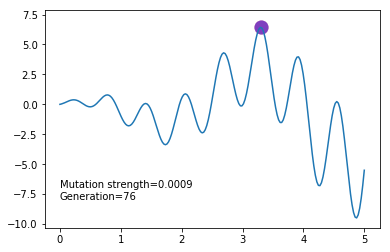

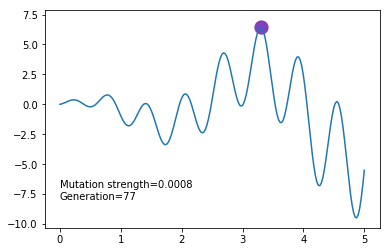

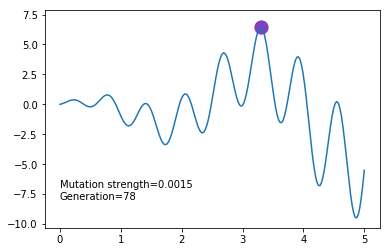

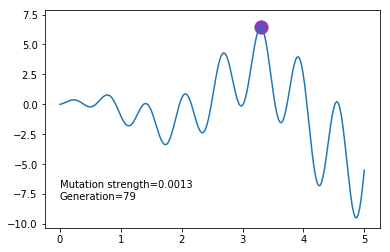

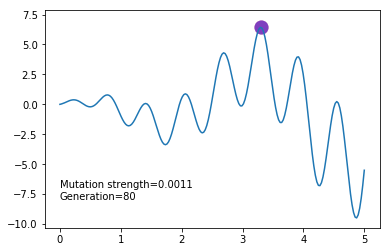

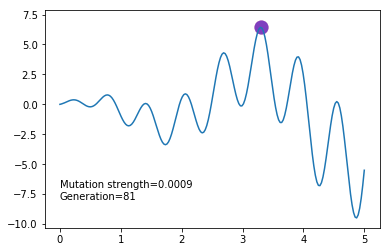

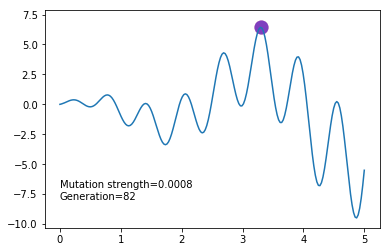

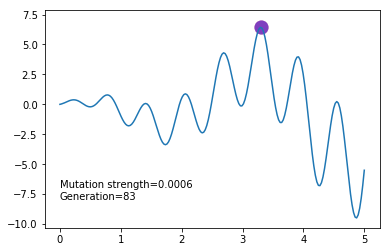

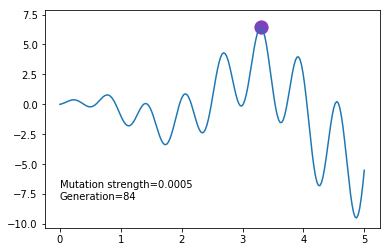

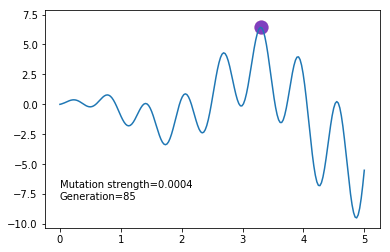

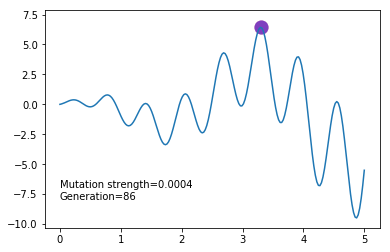

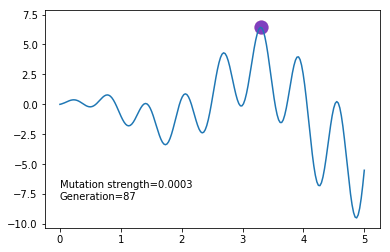

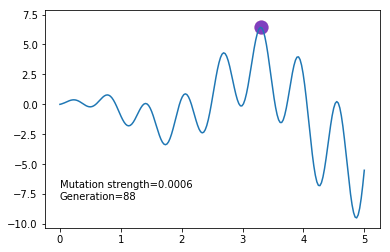

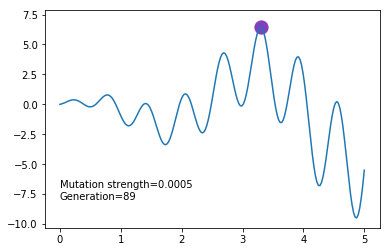

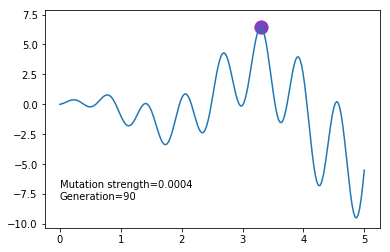

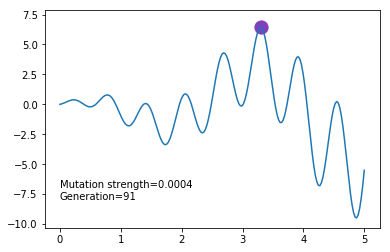

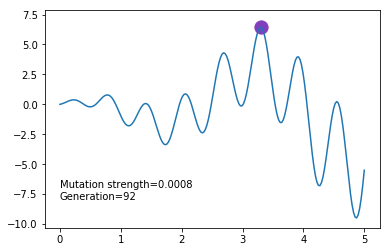

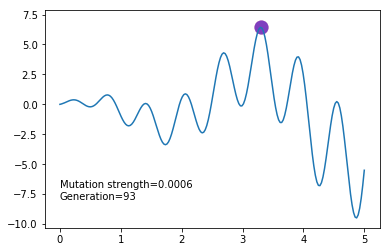

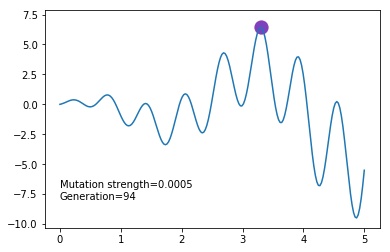

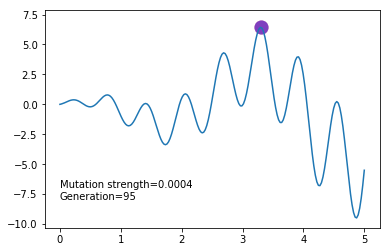

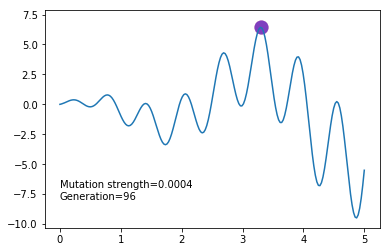

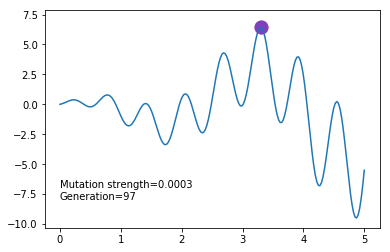

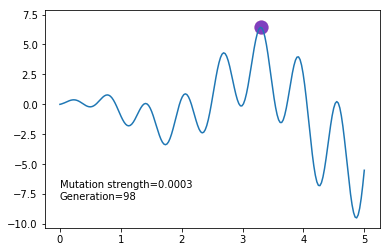

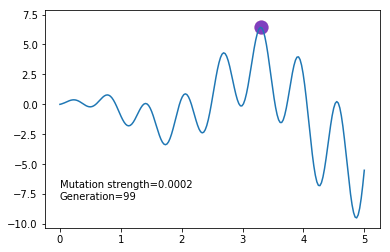

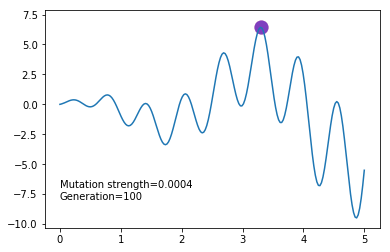

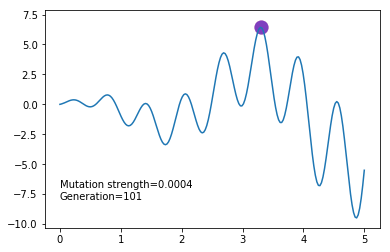

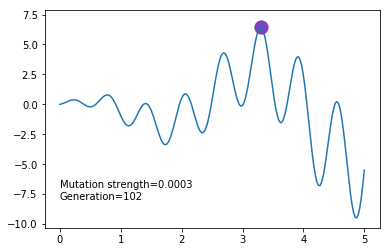

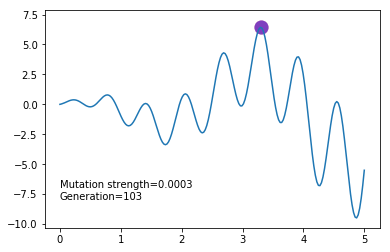

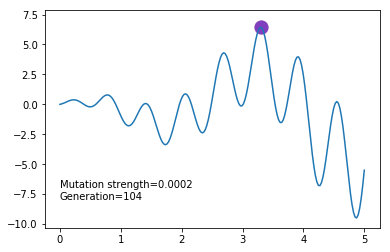

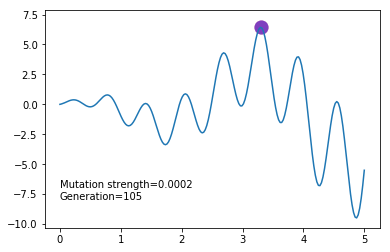

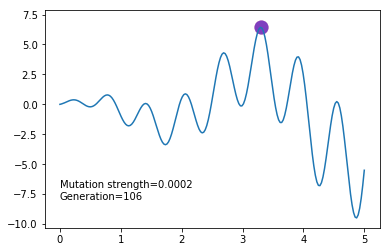

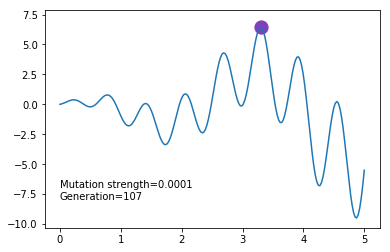

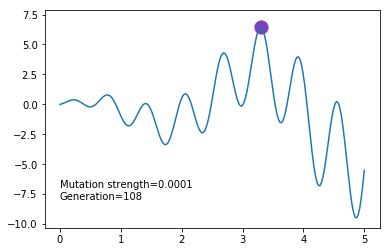

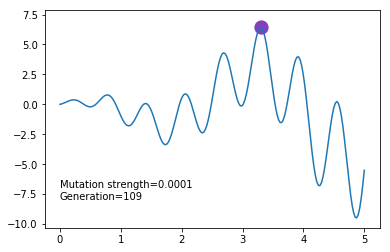

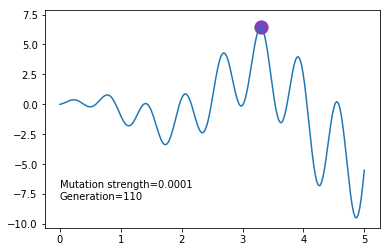

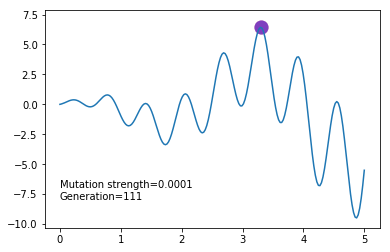

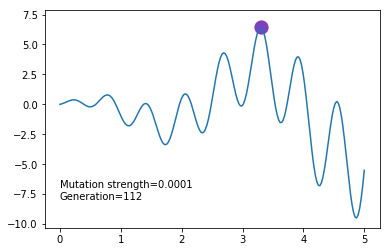

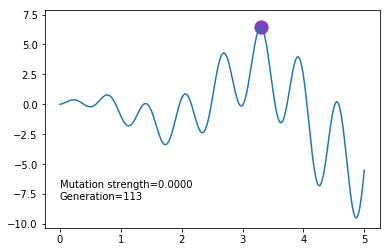

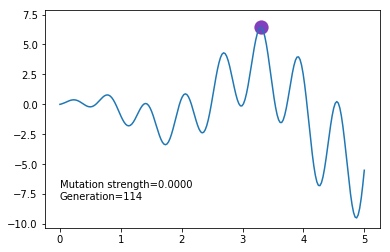

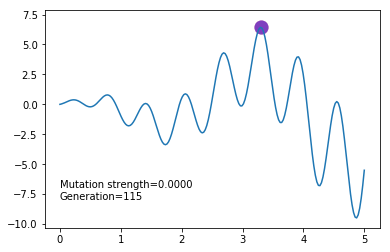

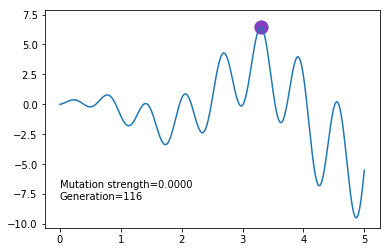

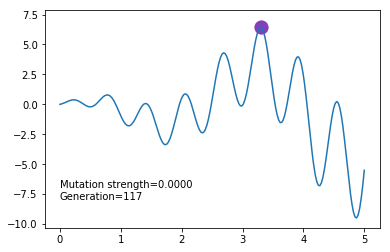

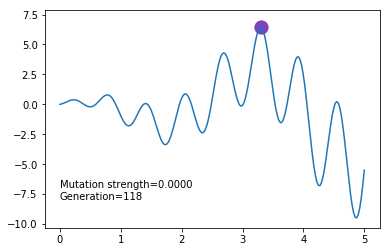

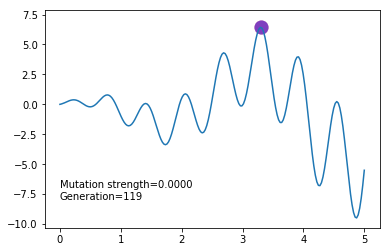

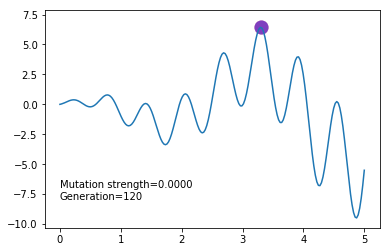

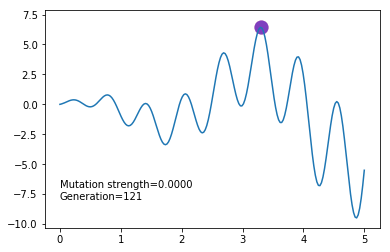

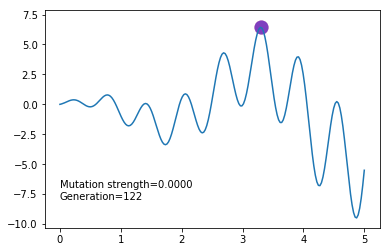

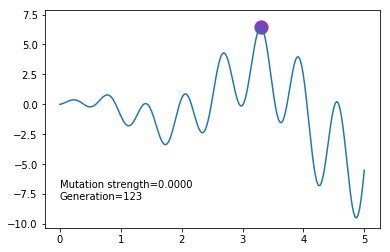

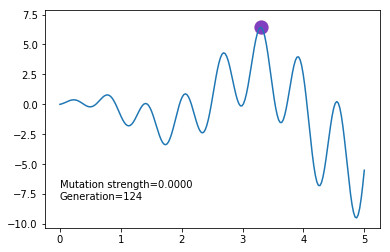

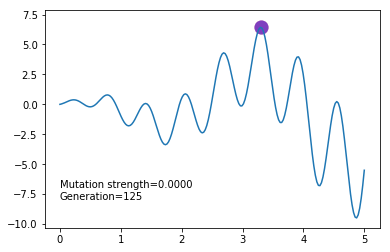

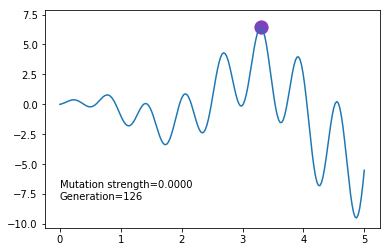

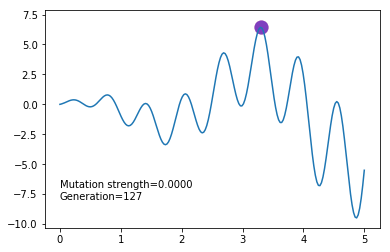

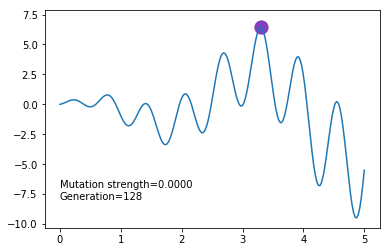

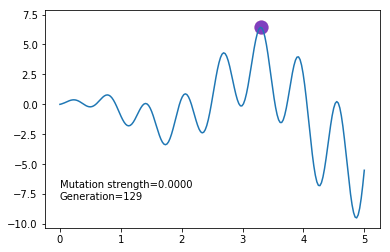

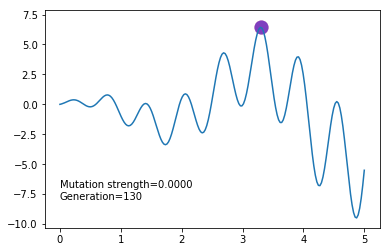

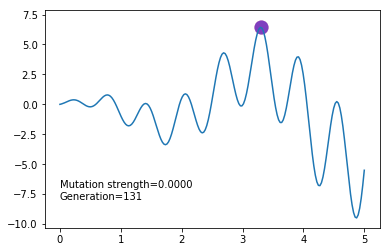

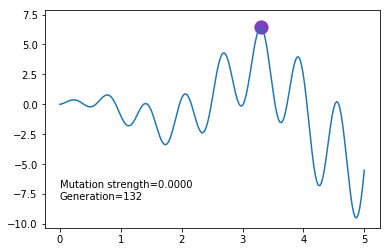

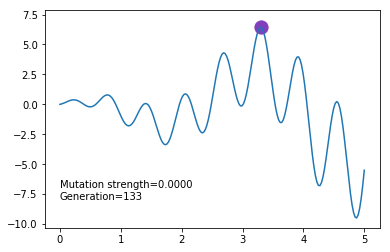

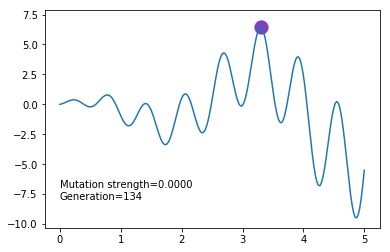

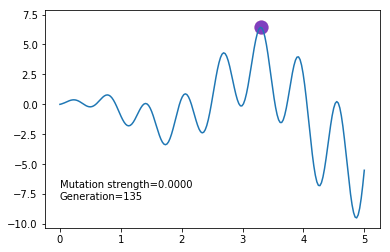

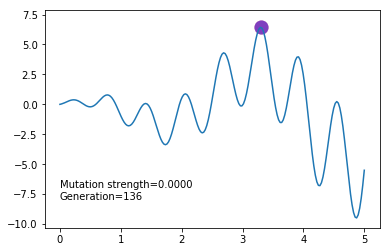

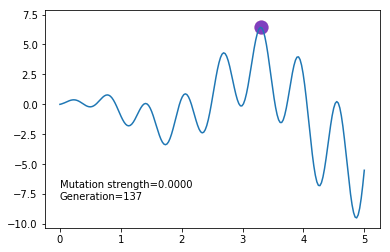

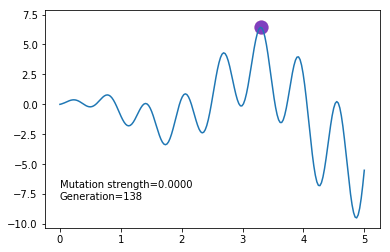

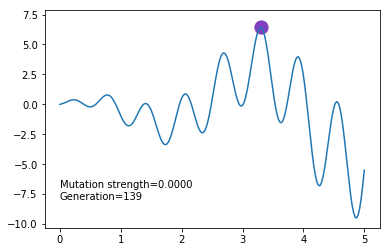

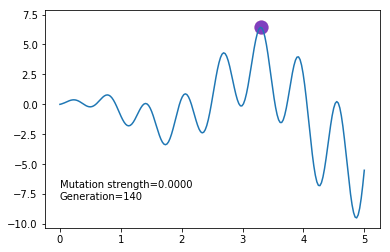

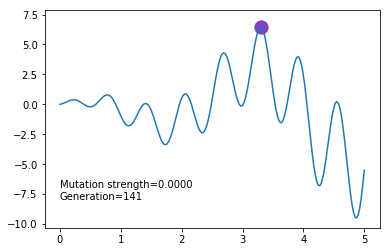

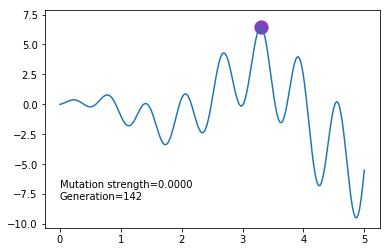

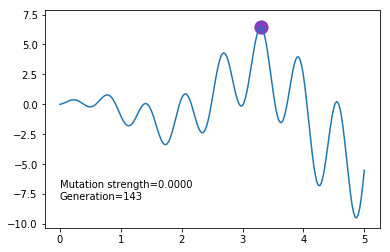

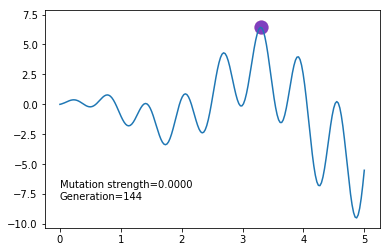

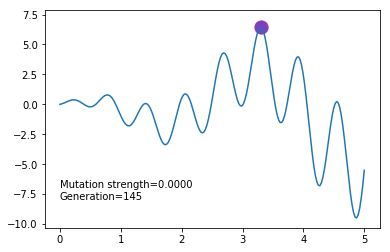

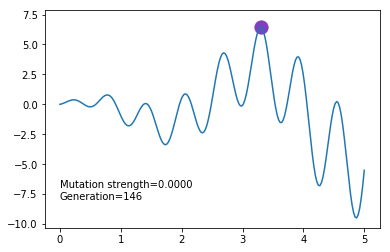

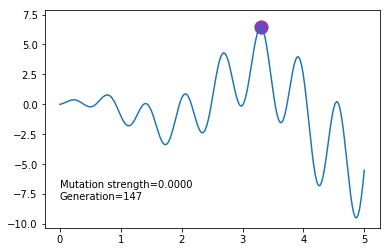

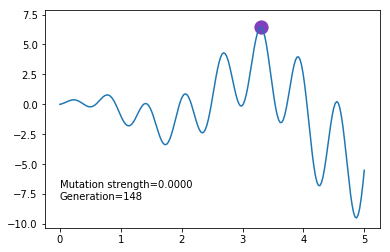

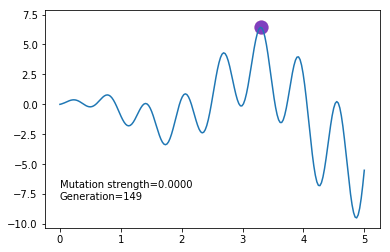

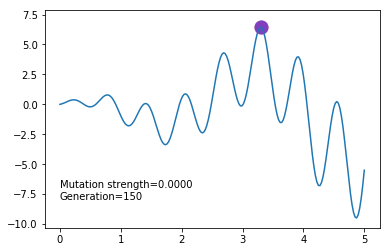

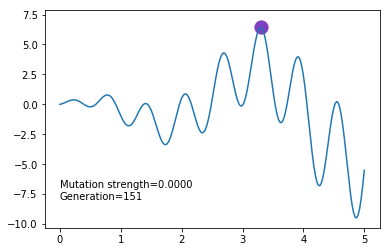

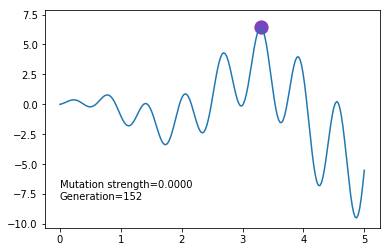

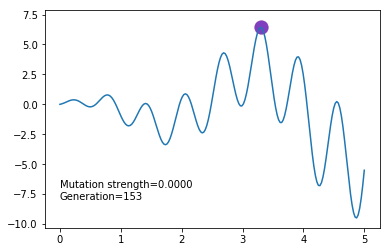

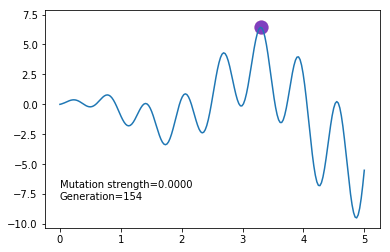

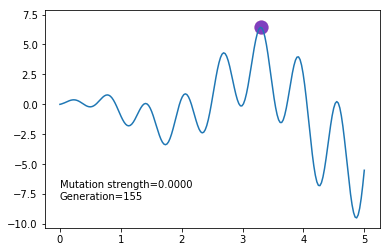

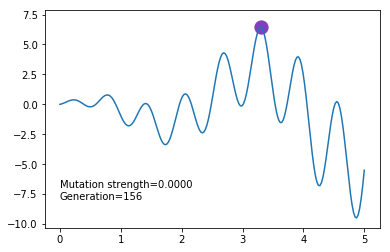

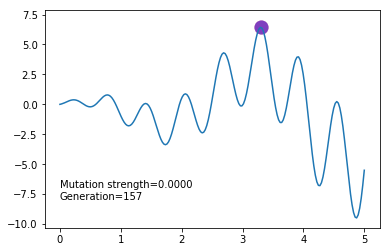

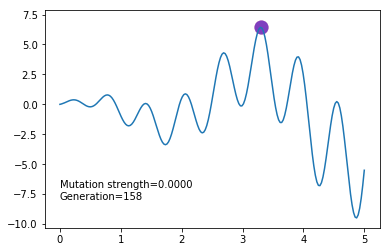

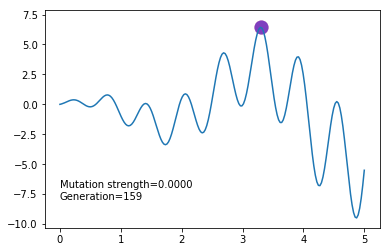

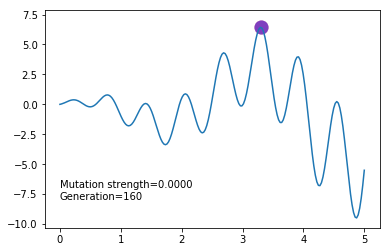

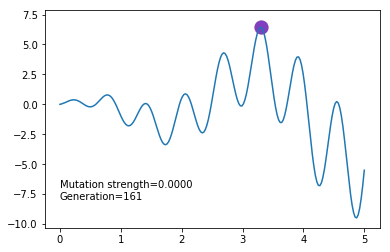

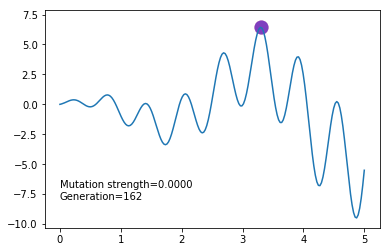

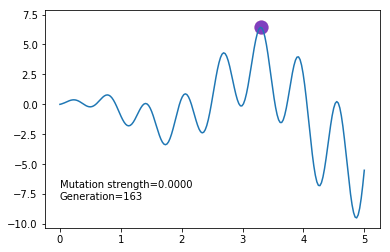

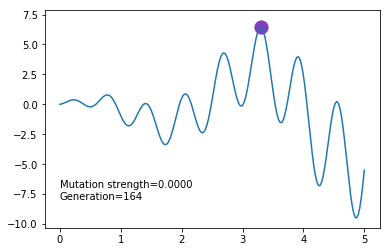

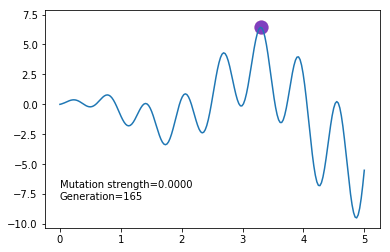

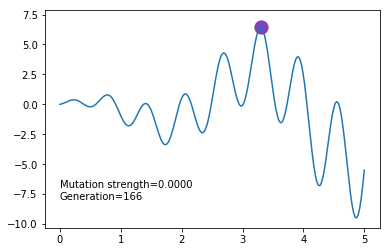

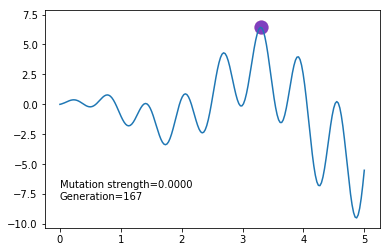

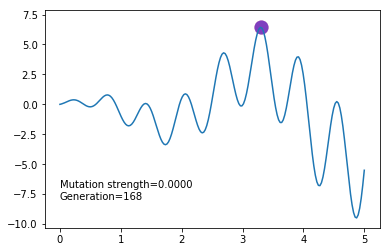

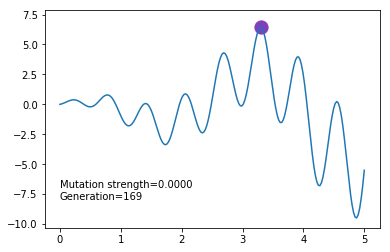

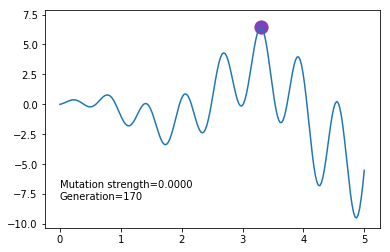

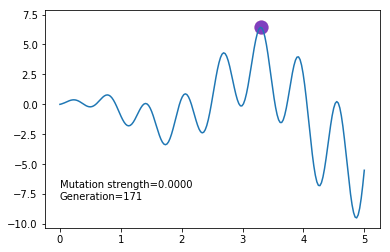

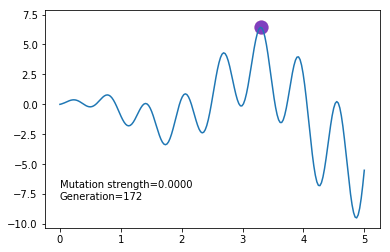

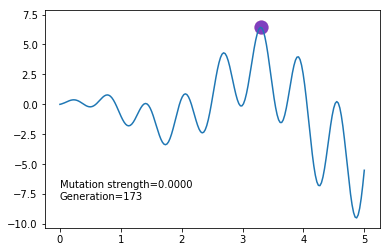

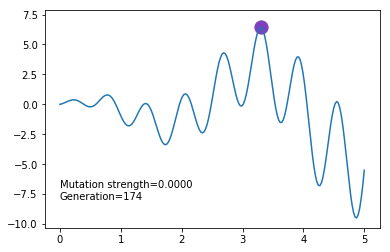

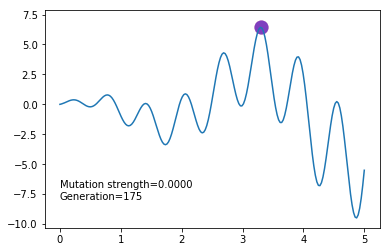

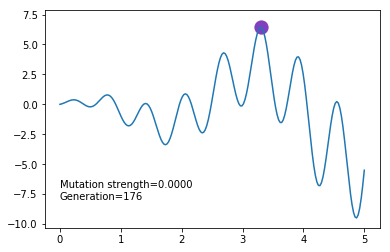

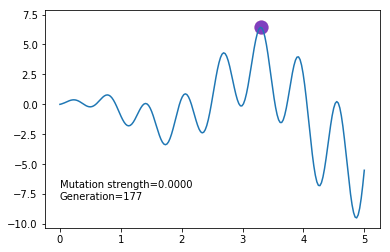

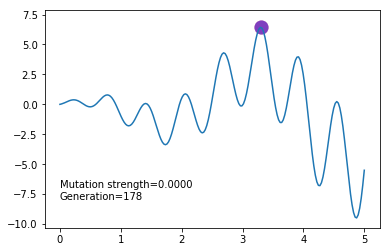

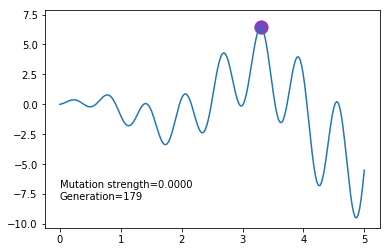

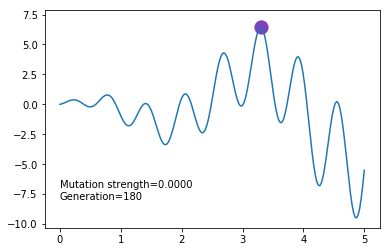

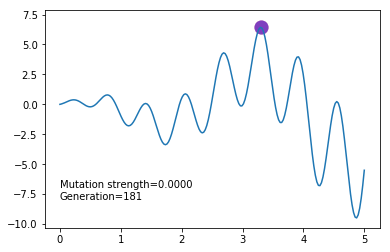

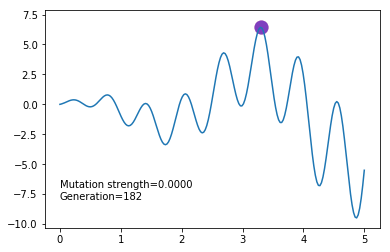

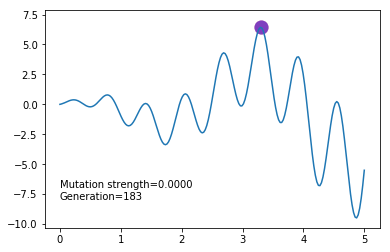

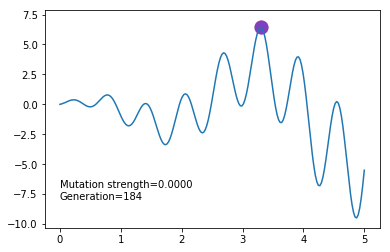

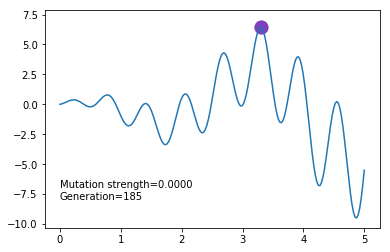

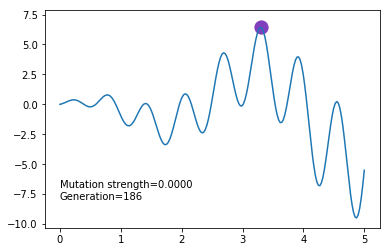

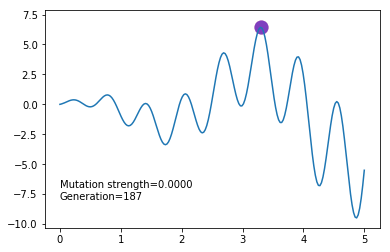

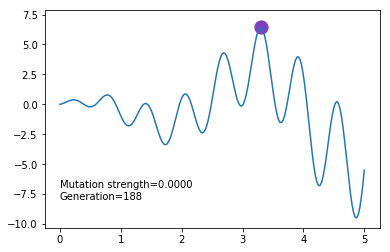

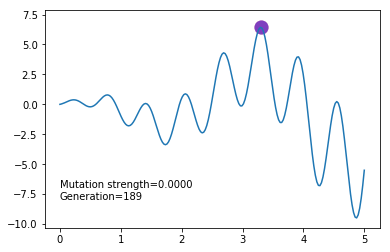

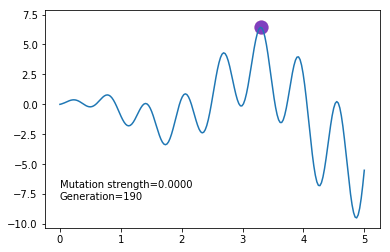

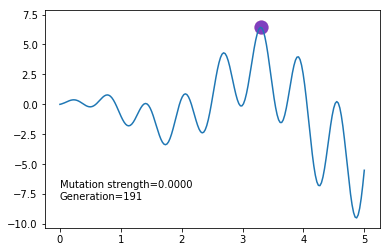

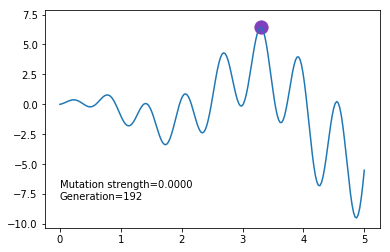

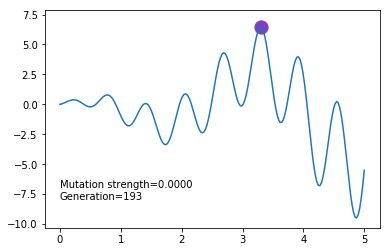

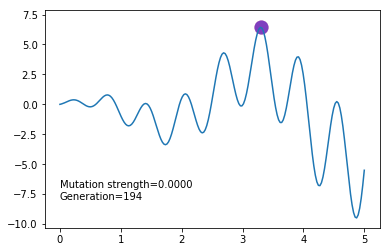

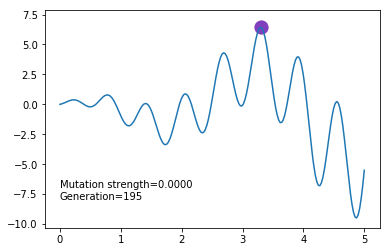

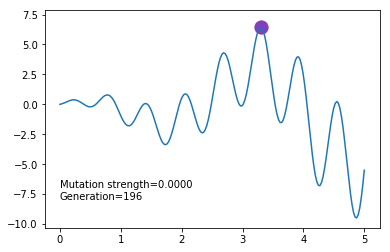

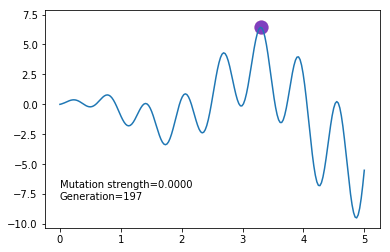

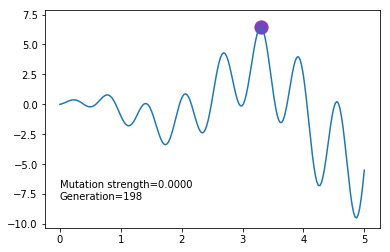

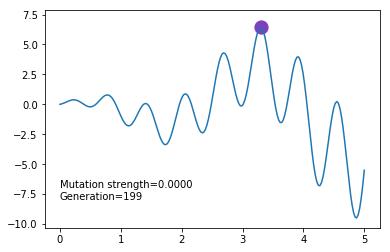

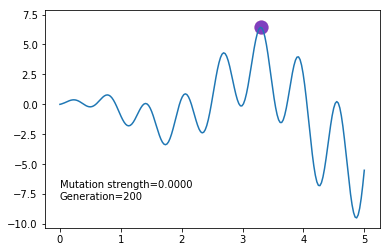

In [10]:
if mtype == 'A':
    %matplotlib inline
    plt.ion()       
    x = np.linspace(*DNA_BOUND, 200)

    for g in range(N_GENERATIONS):
        kid = make_kid(parent)
        py, ky = F(parent), F(kid)
        parent = kill_bad(parent, kid)

        plt.cla()
        plt.plot(x, F(x))
        plt.scatter(parent, py, s=200, lw=0, c='red', alpha=0.5,)
        plt.scatter(kid, ky, s=200, lw=0, c='blue', alpha=0.5)
        plt.text(0, -7, 'Mutation strength=%0.4f' % MUT_STRENGTH)
        plt.text(0, -8, 'Generation=%d' % (g+1))
        plt.pause(0.05)

    plt.ioff()
    plt.show()
else:
    print('Method A was not selected')

### Method B - Early exit or 200 times

In [11]:
if mtype == 'B':
    %matplotlib inline
    plt.ion()       
    x = np.linspace(*DNA_BOUND, 200)

    m=1.00001
    g=0
    while (g < N_GENERATIONS) and (round(m,4) > 0.001):
        g+=1
        kid = make_kid(parent)
        py, ky = F(parent), F(kid)
        parent = kill_bad(parent, kid)

        m = MUT_STRENGTH
        plt.cla()
        plt.plot(x, F(x))
        plt.scatter(parent, py, s=200, lw=0, c='green', alpha=0.5,)
        plt.scatter(kid, ky, s=200, lw=0, c='blue', alpha=0.5)
        plt.text(0, -7, 'Mutation strength=%0.4f' % m)
        plt.text(0, -8, 'Generation=%d' % (g))
        plt.pause(0.05)

    plt.ioff()
    plt.show()
    
    print('Took %d generation, and use only %0.3f %% total effort for 200 generations' % (g,(g/2)))
else:
    print('Method B was not selected')

Method B was not selected


## Done

In [12]:
import datetime
now = datetime.datetime.now()
print('Done!',str(now))

Done! 2019-04-27 13:28:38.622179
